# SeisClient Tutorial
---
[**SeisClient**](https://github.com/Liang-Ding/seisclient) is a Python package to request accurate 3D Greens' function and synthetic waveform from [**SeisCloud**](https://seis.cloud) which is a data server hosting pre-computed receiver-side 3D Greens' function database. 

[**SeisClient**](https://github.com/Liang-Ding/seisclient) can be utilized to request Greens' function and synthetic waveform from point sources, multiple-point sources, and finite faults for various applications such as earthquake source characterization, induced seismicity monitoring, and Earthquake Early Warning (EEW).

In [1]:
# load packages
from seisclient.seisclient import SeisClient
from obspy.core.util.attribdict import AttribDict
import numpy as np

# for visualizations in-notebook
from IPython.display import Image

## Models in SeisCloud
---
* Check models and stations available in remote database: [https://seis.cloud/models/](https://seis.cloud/models/)
* Use your own 3D background models with SeisCloud: [https://seis.cloud/contact/](https://seis.cloud/contact/)

In [2]:
# request model parameters
req = SeisClient()

# specify the model name
model = 'SOCAL3D'

# request the model parameters
info_dict, _ = req.request_model_info(model)
info_dict

{'lat_min': 35.35,
 'lat_max': 36.398,
 'lat_delta': 0.002,
 'long_min': -118.2,
 'long_max': -117.302,
 'long_delta': 0.002,
 'depth_min': 0.0,
 'depth_max': 10800.0,
 'depth_delta': 200.0}

## Request synthetic waveform from point source
---
* Set station, source, saving_dir
* Request synthetic waveform with CMTSOLUTION
* Request synthetic waveform with FORCESOLUTION

In [3]:
# station (eg: station SLA in Network CI)
station = AttribDict({
    'latitude': 35.890,
    'longitude': -117.283,
    'network': 'CI',
    'station': 'SLA',
    'location': '',
    'id': 'SLA'})

# source
origin = AttribDict({'latitude': 35.601,
                     'longitude': -117.597,
                     'depth_in_m': 2810.0,
                     'id': 'evt1'})

# the folder storing the request data. 
saving_dir = './data/'

3 Trace(s) in Stream:
...SYR | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...SYT | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...SYZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples


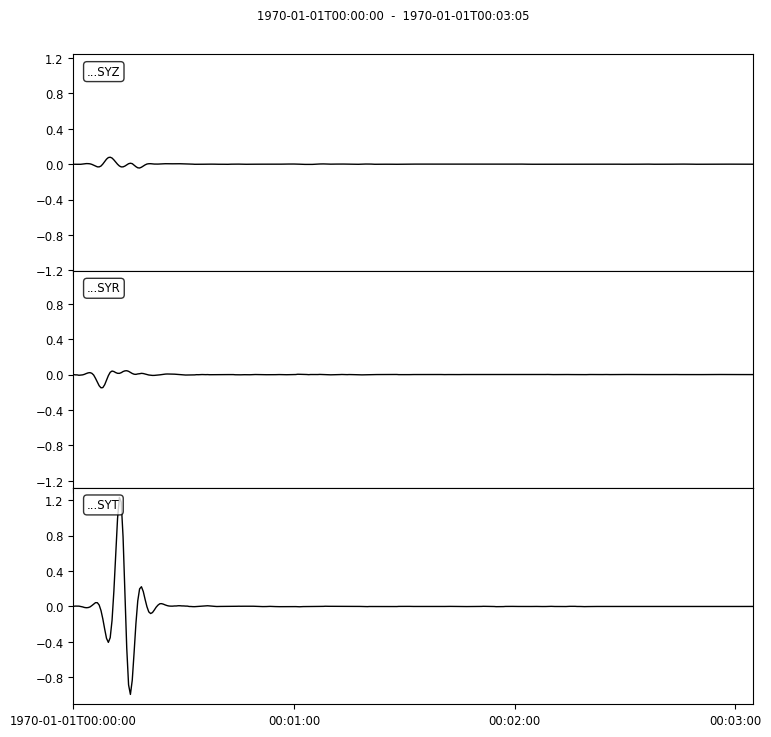

In [4]:
# CMTSOLUTION
# set moment tensor eg: CMT in dyn.cm -> n.m
mt_cmt = np.array([-2.900000e+25, -4.120000e+26, 4.410000e+26, 8.580000e+25, 4.470000e+25, 1.010000e+26])/1E7

# request synthetic waveform 
syn_cmt = req.get_synthetic_mtsolution(model=model, station=station, origin=origin, save_dir=saving_dir, mt_RTP=mt_cmt, b_RTZ=True)
print(syn_cmt)
syn_cmt.plot(outfile="syn_cmt.png", show=False)

3 Trace(s) in Stream:
CI.SLA..SYT | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
CI.SLA..SYR | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
CI.SLA..SYZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples


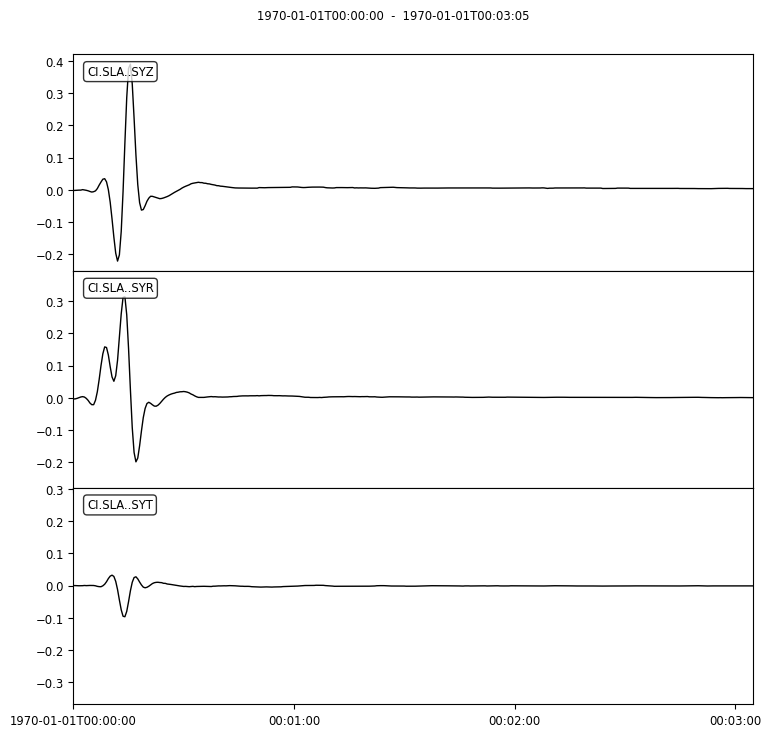

In [5]:
# FORCESOLUTION
# set force solution in ENZ.
force_enz = [1e15, 2e15, 3e15]

# request synthetic waveform
syn_f = req.get_synthetic_forcesolution(model=model, station=station, origin=origin, save_dir=saving_dir, force_enz=force_enz, b_RTZ=True)
print(syn_f)
syn_f.plot(outfile="syn_f.png", show=False)

## Request Greens' function 
* fk-type Greens' function
* 3D Greens' function

In [6]:
# fk-type Greens' function
greens_fk = req.get_greens_fk(model=model, station=station, origin=origin, save_dir=saving_dir)
print(greens_fk)

12 Trace(s) in Stream:
...REP | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...TEP | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...ZEP | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...RDD | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...TDD | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...ZDD | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...RDS | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...TDS | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...ZDS | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...RSS | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...TSS | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 sample

In [7]:
# 3D Greens' function
greens_3d = req.get_greens_3DMT(model=model, station=station, origin=origin, save_dir=saving_dir)
print(greens_3d)

18 Trace(s) in Stream:
...Z.Mtt | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...R.Mtt | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...T.Mtt | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...Z.Mtp | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...R.Mtp | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...T.Mtp | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...Z.Mrt | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...R.Mrt | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...T.Mrt | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...Z.Mpp | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000Z | 2.0 Hz, 371 samples
...R.Mpp | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:03:05.000000